# Visualizing and animating MTA turnstile data on a map

# learning goals

* show different choices of visualization, and the story-telling aspect
* show the process of data munging, and transformations between datasets
* show how to decipher errors, show all the wart-y steps in working with real data.
* at end, when cleaning up: show how to chunk a project into little pieces

Some prerequisites:
* data types, lists, dictionaries, boolean operators.
* Libraries, functions and call signatures.
* tabular filtering ops
* memory access: view versus copy

So this is a relatively complex notebook, and needs time to build up to.
I do not expect the HS students to be able to build the library functions on their own, it may be necessary to provide the library functions and explain what they do in simple terms. functions.

The goal is to try to spark curiosity, and to try to work through some of the hard parts together.

BEWARE chained indexing.
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

TODO: think about scaffolding projects that could lead to this level of complexity.

--AaronT, 2022 July 06

In [148]:
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import geopandas as gpd
import pandas as pd
import pygmt

import mta

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data for 2022 June 18 to 24

In [286]:
df = mta.read_csv("dat/turnstile_220625.txt")

In [287]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-18 00:00:00,REGULAR,7726949,2716406
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-18 04:00:00,REGULAR,7726955,2716414
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-18 08:00:00,REGULAR,7726964,2716438
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-18 12:00:00,REGULAR,7726999,2716522
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-06-18 16:00:00,REGULAR,7727100,2716564
...,...,...,...,...,...,...,...,...,...,...
212407,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-24 05:00:00,REGULAR,0,598
212408,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-24 09:00:00,REGULAR,0,598
212409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-24 13:00:00,REGULAR,0,601
212410,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-24 17:00:00,REGULAR,0,604


In [276]:
# beware, the station selection process
# might get dicey for more complex stations,
# e.g., Fulton Street serving A,C,J,Z; 2,3,4,5 with all of
# IND, BMT, and IRT divisions.

#station = mta.select_station(df, station='125 ST', linename='1')
#station = mta.select_station(df, station='125 ST', linename='23')  # has some bad data
#station = mta.select_station(df, station='125 ST', linename='456')
station = mta.select_station(df, station='125 ST', linename='ACBD')

In [277]:
station

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS
49014,N025,R102,01-00-00,125 ST,ACBD,IND,2022-06-18 00:00:00,REGULAR,505329,578064
49015,N025,R102,01-00-00,125 ST,ACBD,IND,2022-06-18 04:00:00,REGULAR,505341,578133
49016,N025,R102,01-00-00,125 ST,ACBD,IND,2022-06-18 08:00:00,REGULAR,505383,578174
49017,N025,R102,01-00-00,125 ST,ACBD,IND,2022-06-18 12:00:00,REGULAR,505475,578265
49018,N025,R102,01-00-00,125 ST,ACBD,IND,2022-06-18 16:00:00,REGULAR,505581,578413
...,...,...,...,...,...,...,...,...,...,...
49681,N026,R102,00-05-01,125 ST,ACBD,IND,2022-06-24 04:00:00,REGULAR,327680,681
49682,N026,R102,00-05-01,125 ST,ACBD,IND,2022-06-24 08:00:00,REGULAR,327680,683
49683,N026,R102,00-05-01,125 ST,ACBD,IND,2022-06-24 12:00:00,REGULAR,327680,686
49684,N026,R102,00-05-01,125 ST,ACBD,IND,2022-06-24 16:00:00,REGULAR,327680,686


In [278]:
turnstiles = mta.split_turnstiles(station)
# check data quality
for ts in turnstiles:
    assert mta.is_turnstile_nominal(ts)

In [279]:
merge = mta.merge_dfs(turnstiles)

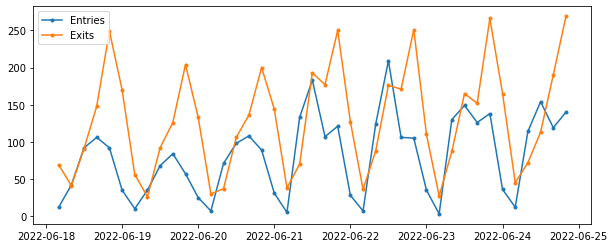

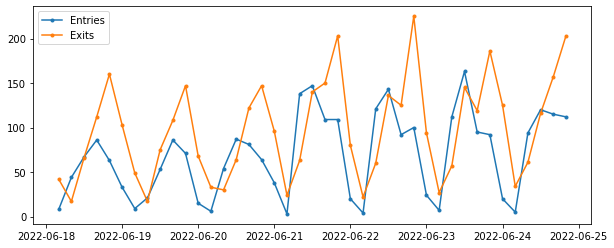

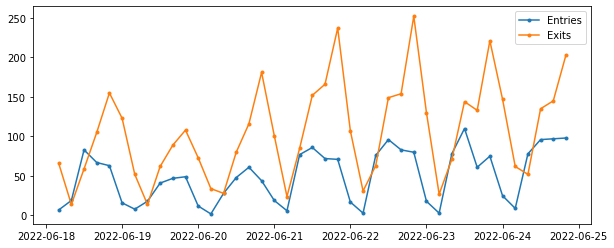

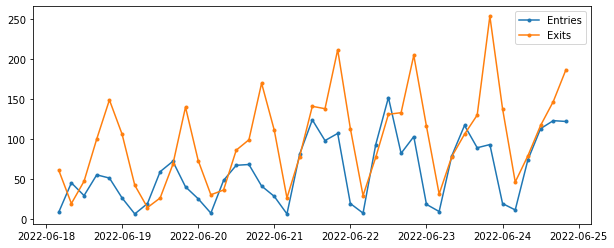

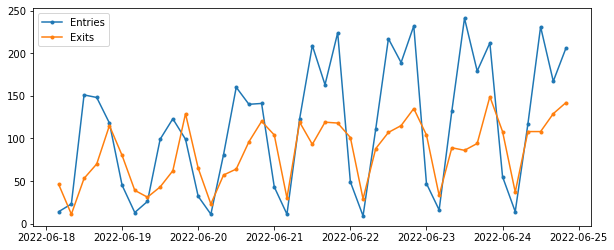

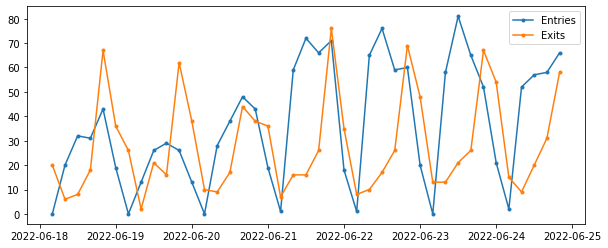

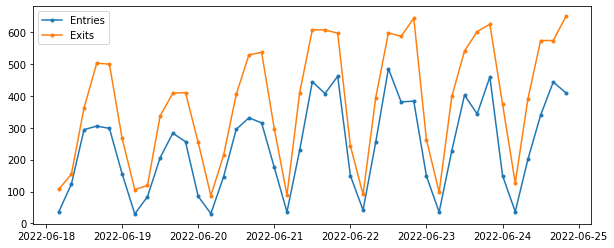

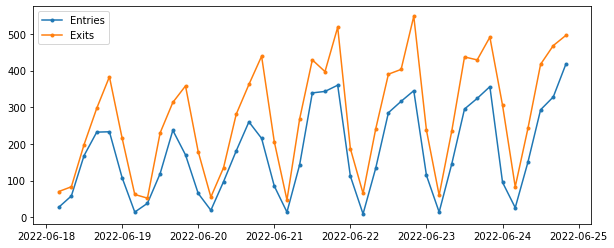

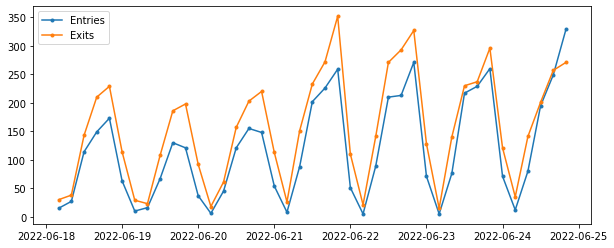

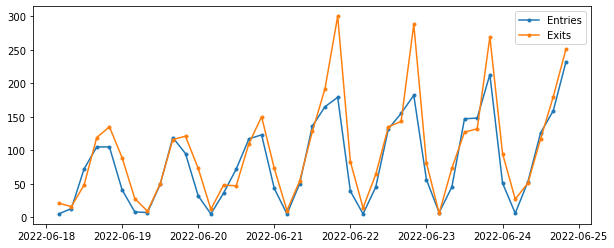

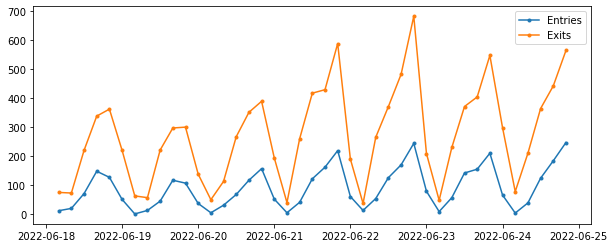

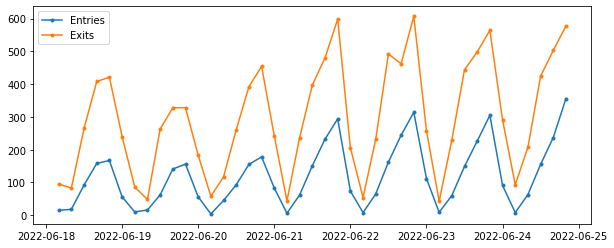

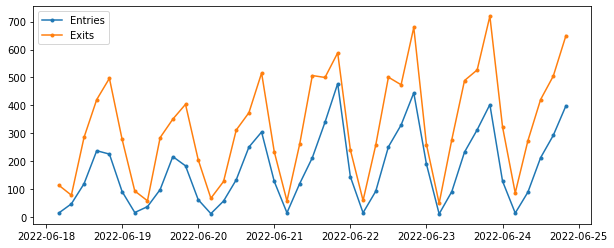

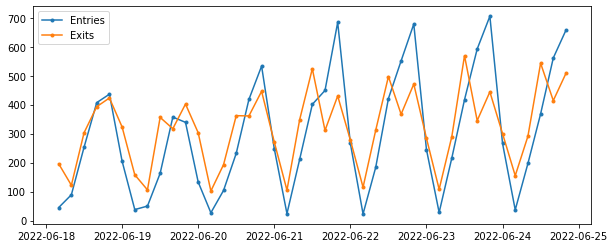

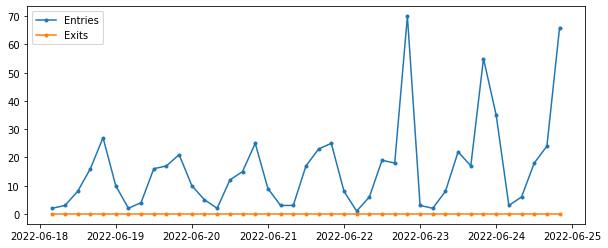

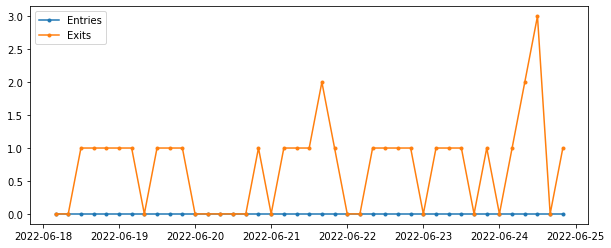

In [284]:
for x in turnstiles:
    plt.figure(figsize=(10,4))
    plt.plot(x['TIME'][1:], np.diff(x['ENTRIES']), '.-', label='Entries')
    plt.plot(x['TIME'][1:], np.diff(x['EXITS']), '.-', label='Exits')
    plt.legend()
    plt.show()

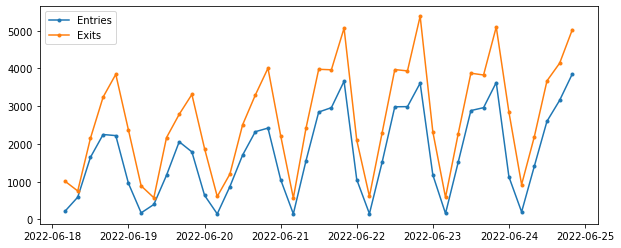

In [285]:
plt.figure(figsize=(10,4))
plt.plot(merge['TIME'][1:], np.diff(merge['ENTRIES']), '.-', label='Entries')
plt.plot(merge['TIME'][1:], np.diff(merge['EXITS']), '.-', label='Exits')
plt.legend()
plt.show()

# Inspect the data for a station that has RECOVR AUD

TODO 2022 July 12 - not done yet

In [474]:
station = mta.select_station(df, station='125 ST', linename='23')

In [475]:
turnstiles = mta.split_turnstiles(station)
# check data quality
for ii, ts in enumerate(turnstiles):
    if mta.is_turnstile_nominal(ts):
        pass
    else:
        print("{:d}-th turnstile has not-nominal data".format(ii))

0-th turnstile has not-nominal data
1-th turnstile has not-nominal data
2-th turnstile has not-nominal data
3-th turnstile has not-nominal data
4-th turnstile has not-nominal data
5-th turnstile has not-nominal data
6-th turnstile has not-nominal data
7-th turnstile has not-nominal data


In [476]:
ts = turnstiles[0]

In [477]:
ts

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS
176838,R304,R206,00-00-00,125 ST,23,IRT,2022-06-18 01:00:00,REGULAR,1690289916,789931139
176839,R304,R206,00-00-00,125 ST,23,IRT,2022-06-18 05:00:00,REGULAR,1690289906,789931149
176840,R304,R206,00-00-00,125 ST,23,IRT,2022-06-18 09:00:00,REGULAR,1690289820,789931184
176841,R304,R206,00-00-00,125 ST,23,IRT,2022-06-18 13:00:00,REGULAR,1690289648,789931254
176842,R304,R206,00-00-00,125 ST,23,IRT,2022-06-18 17:00:00,REGULAR,1690289425,789931316
176843,R304,R206,00-00-00,125 ST,23,IRT,2022-06-18 21:00:00,REGULAR,1690289261,789931391
176844,R304,R206,00-00-00,125 ST,23,IRT,2022-06-19 01:00:00,REGULAR,1690289193,789931428
176845,R304,R206,00-00-00,125 ST,23,IRT,2022-06-19 05:00:00,REGULAR,1690289181,789931446
176846,R304,R206,00-00-00,125 ST,23,IRT,2022-06-19 09:00:00,REGULAR,1690289108,789931467
176847,R304,R206,00-00-00,125 ST,23,IRT,2022-06-19 13:00:00,REGULAR,1690288984,789931510


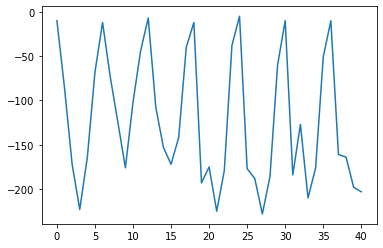

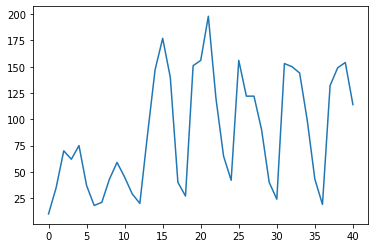

In [481]:
plt.plot(np.diff(ts['ENTRIES']))
plt.show()

plt.plot(np.diff(ts['EXITS']))
plt.show()

# Plot merged results for multiple stations

Manually extracted from MTA station entrance/exit geo data

TODO 2022 July 12 - visually underwhelming, think about other ways to show (probably lightness / transparency, perhaps mixed with size)

In [295]:
directory = [
    dict(
        station='125 ST',
        linename='1',
        longitude=-73.958372,  # IRT Broadway-7th Ave line
        latitude=40.815581,
    ),
    dict(
        station='125 ST',
        linename='ACBD',
        longitude=-73.952343,  # IND 8th Ave line
        latitude=40.811109,
    ),
    #dict(
    #    station='125 ST',
    #    linename='23',
    #    longitude=-73.945495,  # IRT Lenox line, has some RECOVR AUD data that I cannot use
    #    latitude=40.807754,
    #),
    dict(
        station='125 ST',
        linename='456',
        longitude=-73.937594,  # IRT Lexington line
        latitude=40.804138,
    ),
]

In [360]:
for d in directory:
    station = mta.select_station(df, station=d['station'], linename=d['linename'])
    turnstiles = mta.split_turnstiles(station)
    # check data quality
    for ts in turnstiles:
        assert mta.is_turnstile_nominal(ts)
    merge = mta.merge_dfs(turnstiles)
    
    # construct a column for diff(entries)
    x = merge['ENTRIES'].diff()
    #x.iloc[0] = 0.0
    merge['D_ENTRIES'] = x
    
    # construct column for diff(exits)
    x = merge['EXITS'].diff()
    #x.iloc[0] = 0.0
    merge['D_EXITS'] = x
    
    # save the merged data
    d['data'] = merge

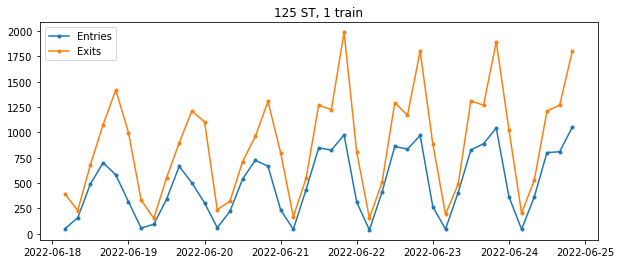

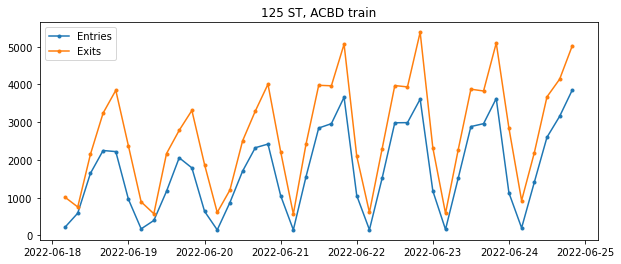

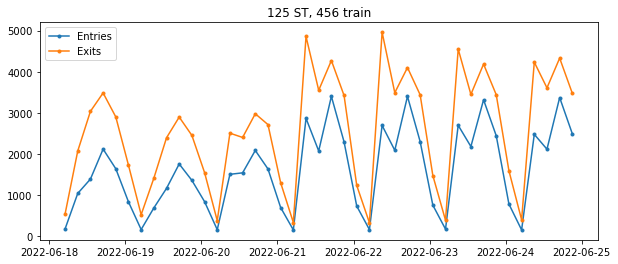

In [361]:
for d in directory:
    merge = d['data']
    plt.figure(figsize=(10,4))
    plt.plot(merge['TIME'], merge['D_ENTRIES'], '.-', label='Entries')
    plt.plot(merge['TIME'], merge['D_EXITS'], '.-', label='Exits')
    plt.legend()
    plt.title("{:s}, {:s} train".format(d['station'], d['linename']))
    plt.show()

# Experiments with maps

Next step: construct a 3-axis dataset with columns:
* lat
* lon
* traffic

for every time we want to consider, in order to visualize the daily/weekly flow of traffic through NYC.

In [438]:
markerscale = 40

In [439]:
region = [-74.3, -73.65, 40.48, 40.93]  # lon/lat bounds
gdf = gpd.read_file("dat/geo_export_95a25c0c-a552-45cc-8f3f-082c40de7b01.shp")

In [440]:
times = directory[0]['data']['TIME']

In [441]:
def underlay(fig):
    fig.basemap(region=region, projection="M15c", frame=True)
    fig.coast(
        region=region,
        #shorelines=True,
        #shorelines=["1"],#, "2", "3", "4"],
        resolution="f",
        projection="M15c",  # Mercator
        land="gray",
        water="skyblue",
    )
    fig.plot(gdf[gdf['boro_name']=='Queens'])
    fig.plot(gdf[gdf['boro_name']=='Brooklyn'])
    fig.plot(gdf[gdf['boro_name']=='Staten Island'])
    fig.plot(gdf[gdf['boro_name']=='Manhattan'])
    fig.plot(gdf[gdf['boro_name']=='Bronx'])

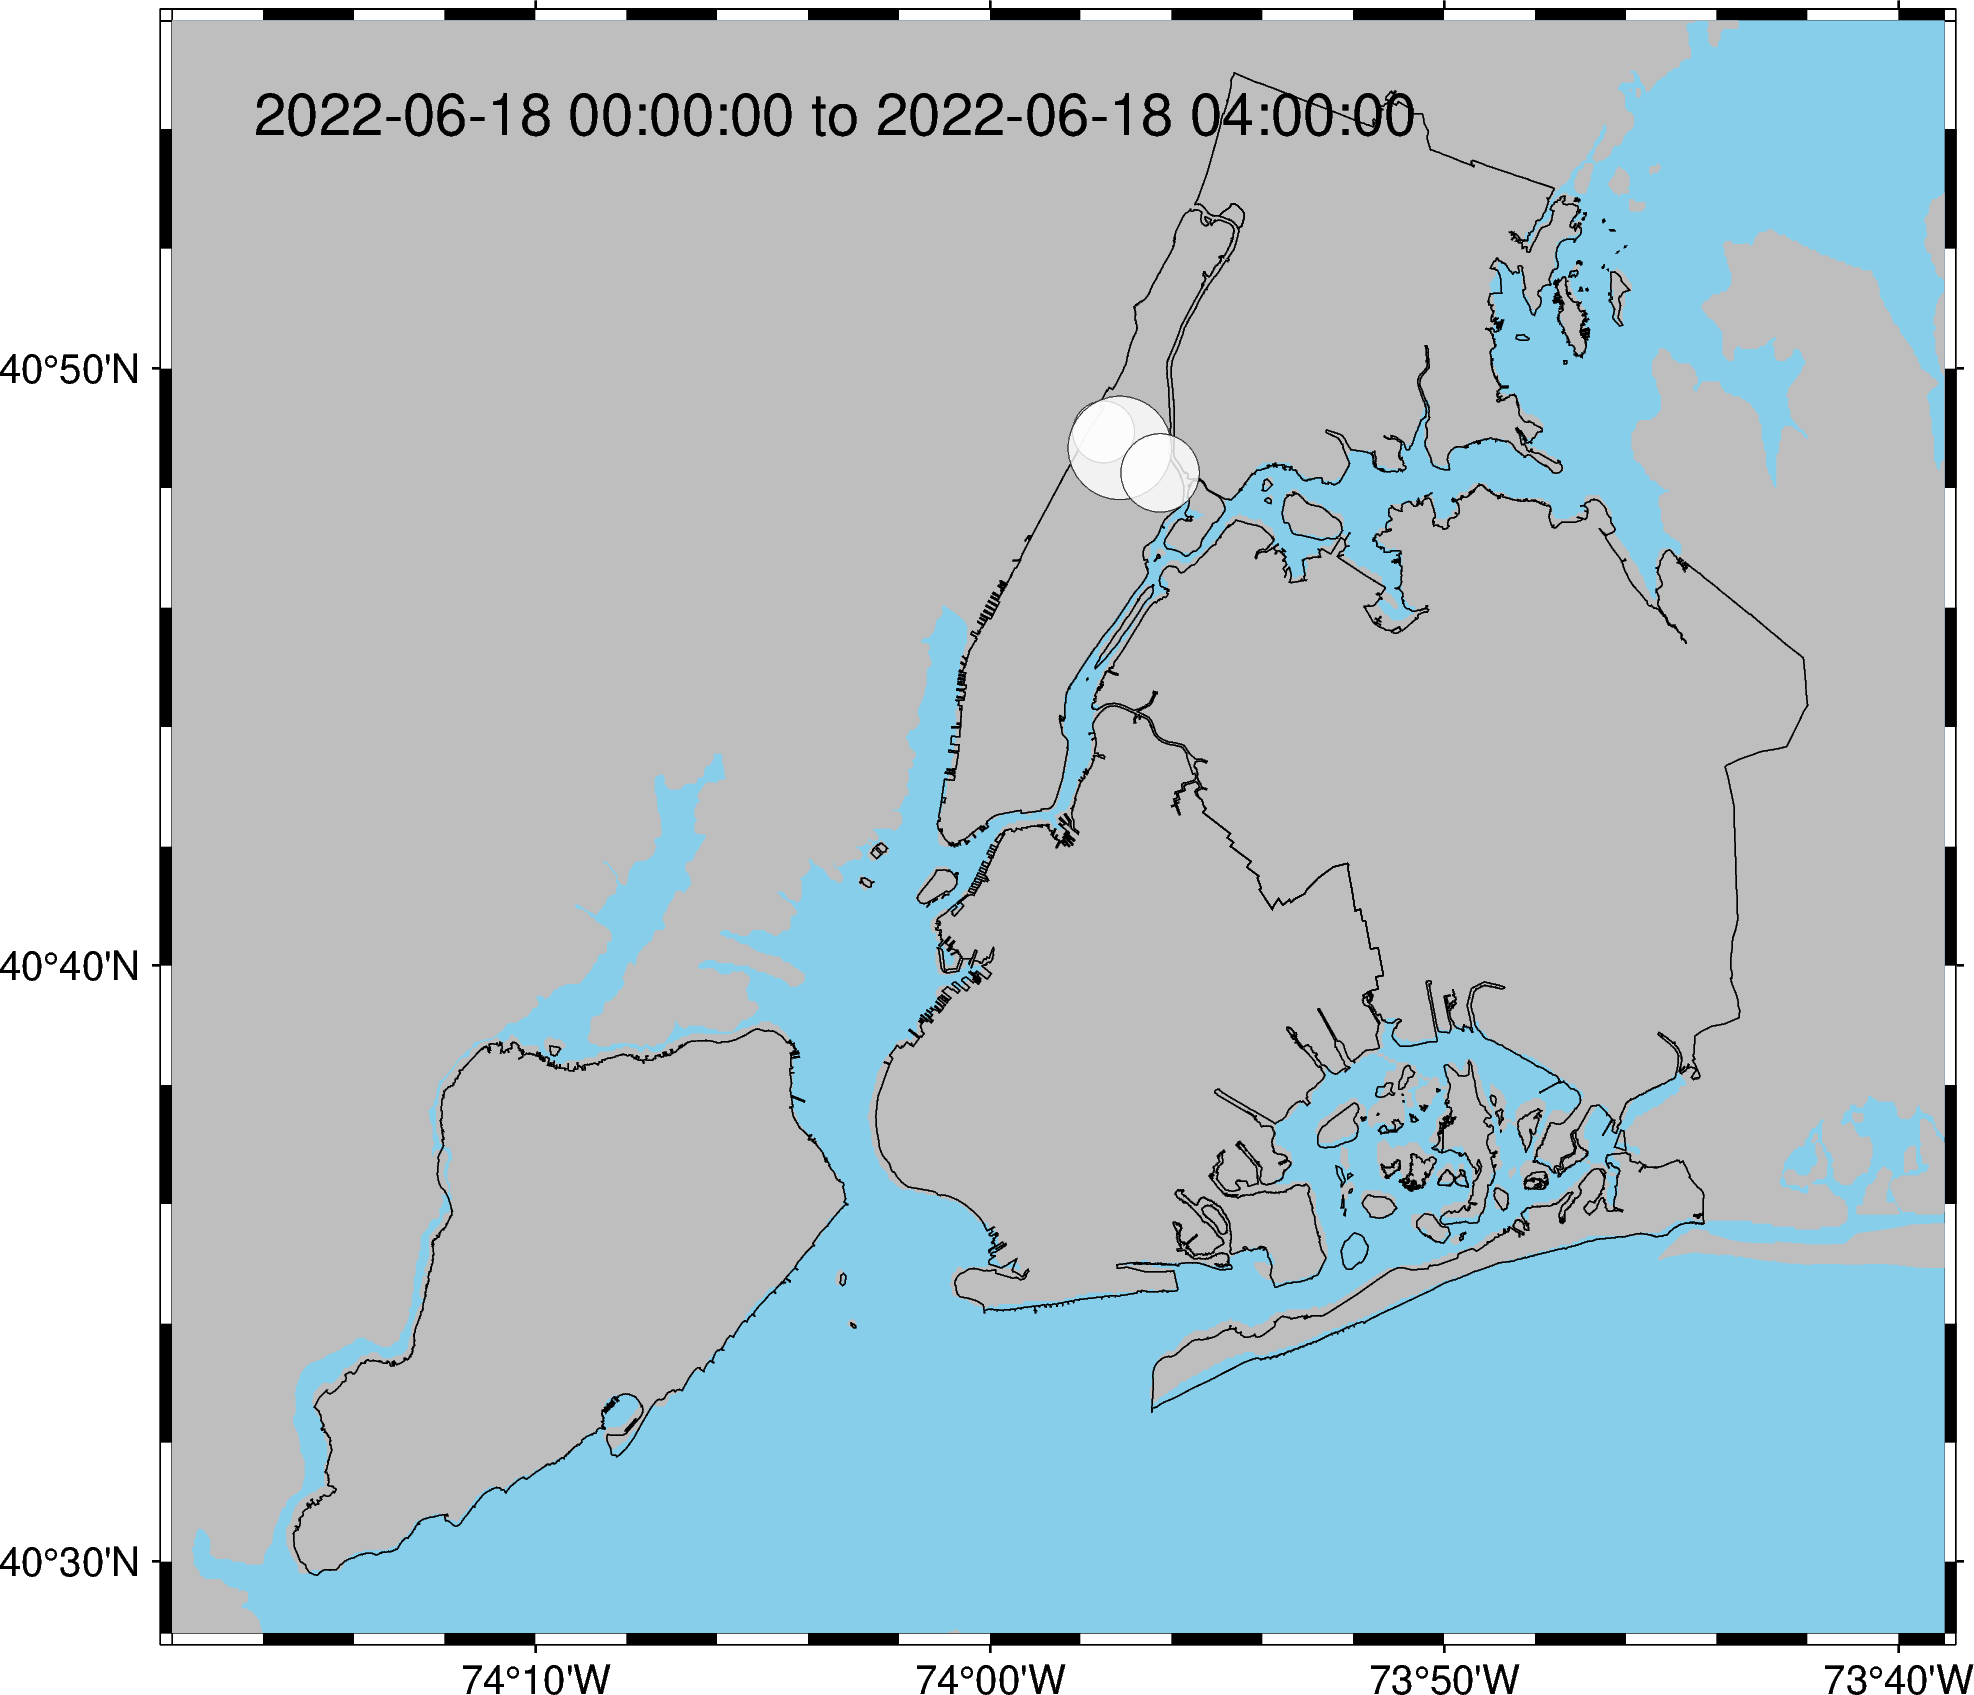

In [442]:
ii, tt = list(times.items())[1]  # for interactive work

fig = pygmt.Figure()

underlay(fig)

for d in directory:
    now = d['data'].iloc[ii]
    traffic = now['D_ENTRIES'] + now['D_EXITS']
    size = traffic**0.5 / markerscale
    fig.plot(
        x=[d['longitude']],
        y=[d['latitude']],
        size=[size],
        style="cc",
        color="white",
        #pen="black",
        pen="0p",
        transparency=20,
    )

label = "{:s} to {:s}".format(str(times[ii-1]), str(times[ii]))
fig.text(text=label, x=-74.27, y=40.91, justify="TL", font="14p")

fig.show()

In [443]:
for ii, tt in times.items():
    if ii == 0:
        continue
    
    fig = pygmt.Figure()
    
    underlay(fig)
    
    for d in directory:
        now = d['data'].iloc[ii]
        traffic = now['D_ENTRIES'] + now['D_EXITS']
        size = traffic**0.5 / markerscale
        fig.plot(
            x=[d['longitude']],
            y=[d['latitude']],
            size=[size],
            style="cc",
            color="white",
            #pen="black",
            pen="0p",
            transparency=20,
        )
    
    label = "{:s} to {:s}".format(str(times[ii-1]), str(times[ii]))
    fig.text(text=label, x=-74.27, y=40.91, justify="TL", font="14p")
    
    #fig.show()
    fig.savefig("out/{:04d}.png".format(ii))
    
    print("saved image", ii, "of", len(times))

saved image 1 of 42
saved image 2 of 42
saved image 3 of 42
saved image 4 of 42
saved image 5 of 42
saved image 6 of 42
saved image 7 of 42
saved image 8 of 42
saved image 9 of 42
saved image 10 of 42
saved image 11 of 42
saved image 12 of 42
saved image 13 of 42
saved image 14 of 42
saved image 15 of 42
saved image 16 of 42
saved image 17 of 42
saved image 18 of 42
saved image 19 of 42
saved image 20 of 42
saved image 21 of 42
saved image 22 of 42
saved image 23 of 42
saved image 24 of 42
saved image 25 of 42
saved image 26 of 42
saved image 27 of 42
saved image 28 of 42
saved image 29 of 42
saved image 30 of 42
saved image 31 of 42
saved image 32 of 42
saved image 33 of 42
saved image 34 of 42
saved image 35 of 42
saved image 36 of 42
saved image 37 of 42
saved image 38 of 42
saved image 39 of 42
saved image 40 of 42
saved image 41 of 42
